<a href="https://colab.research.google.com/github/ekaratnida/applied-machine-learning/blob/master/Module3_2_teacher.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#### Forecasting Using FbProphet

In [ ]:
#!pip install pystan
#!pip install fbprophet
#!pip install statsmodels

import pandas as pd
from fbprophet import Prophet
import matplotlib.pyplot as plt

%matplotlib inline
# check prophet version
# print version number

import warnings
warnings.filterwarnings('ignore')

       Month  Sales
0    1960-01   6550
1    1960-02   8728
2    1960-03  12026
3    1960-04  14395
4    1960-05  14587
..       ...    ...
103  1968-08  16722
104  1968-09  14385
105  1968-10  21342
106  1968-11  17180
107  1968-12  14577

[108 rows x 2 columns]


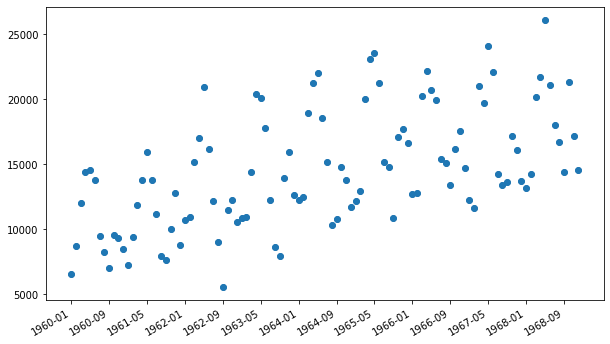

In [ ]:
# load data
path = 'https://raw.githubusercontent.com/ekaratnida/applied-machine-learning/master/monthly-car-sales.csv'
df = pd.read_csv(path, header=0)
print(df)

x = df['Month']
y = df['Sales']

fig, ax = plt.subplots(1,1,figsize=(10,6))
ax.scatter(x, y, s = 30, color = '#336699', alpha = 0.75)
ax.set_xticks(ax.get_xticks()[::8])
fig.autofmt_xdate()

plt.scatter(x,y)


In [ ]:
df1 = df.copy()
df1.set_index('Month',inplace=True)
df1.index=pd.to_datetime(df1.index)
df1.dropna(inplace=True)
#Show new df after changing the index
print(df1)
df1.shape

            Sales
Month            
1960-01-01   6550
1960-02-01   8728
1960-03-01  12026
1960-04-01  14395
1960-05-01  14587
...           ...
1968-08-01  16722
1968-09-01  14385
1968-10-01  21342
1968-11-01  17180
1968-12-01  14577

[108 rows x 1 columns]


(108, 1)

##Decomposition

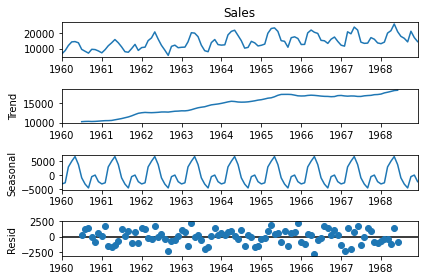

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df1['Sales'],  model='additive')
result.plot();

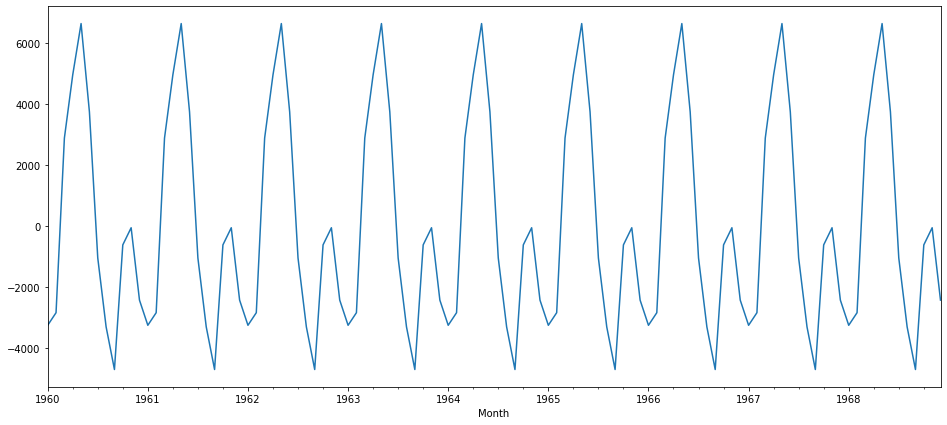

In [ ]:
plt.figure(figsize = (16,7))
result.seasonal.plot();

In [ ]:
from statsmodels.tsa.stattools import adfuller
result = adfuller(df1.Sales.dropna())
print(result[0])
print(result[1])

-1.2238127661752811
0.663269104983288


If result[1] or p-value > 0.05 we need to find the order of differencing (0.66 is high it is not stationary)

Stationary Stochastic Process หรือ Stationary คือ ข้อมูลอนุกรมเวลาที่มีค่าเฉลี่ย หรือค่าความคาดหวัง (Mean or Expected Value) และค่าความแปรปรวน (Variance) และค่าความแปรปรวนร่วม (Covariance) คงที่ (Constant Over Time) ซึ่งไม่ได้ขึ้นอยู่กับเวลา แต่จะขึ้นอยู่กับระยะหรือช่วงห่างของช่วงเวลา (Distance or Lag) 

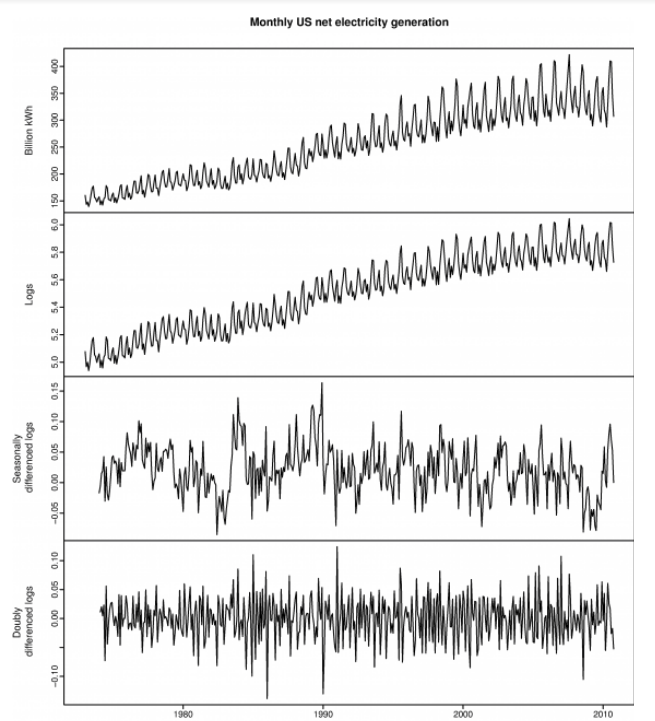

### **Autocorrelation function**

AR, p,
Auto Regressive ตามความหมายก็คือ การใช้ค่าของตัวมันเองในการทำนายวันถัดไปนั่นเองครับ โดยที่พารามิเตอร์ p ของ AR ก็คือ จำนวนเวลาที่ lag ใน time series นั่นเอง โดยการคำนวนจะมีการถ่วงหน้ำหนักด้วย ของ time series ก่อนหน้าหน้าที่ p อีกทีหนึง สรุปง่ายๆ ก็คือ สมการนี้ตั้งอยู่บนสมมุติฐานที่ว่า ค่าของวันที่เราจะทำนายมีความสัมพันธ์กับค่าในอดีตของตัวมันเอง ครับ เช่น ราคาหุ้นวันนี้จะขึ้นกับราคาหุ้นของ x วันก่อน เป็นต้น นี่เป็นคอนเซปที่ AR นำมาใช้กันครับ มาดูสมการกันหน่อย

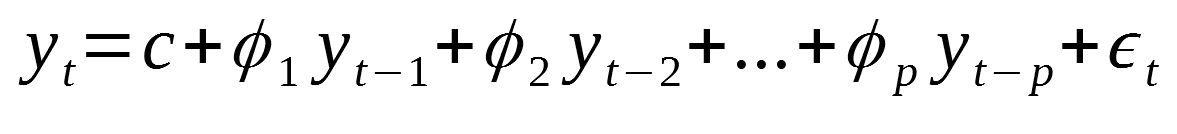![image.png](
  
)

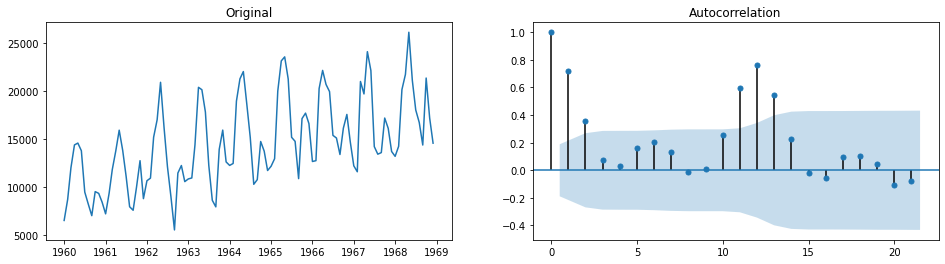

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4)) #p, d, q --> ar, i, ma
ax1.plot(df1.Sales)
ax1.set_title("Original")
plot_acf(df1.Sales, ax=ax2);

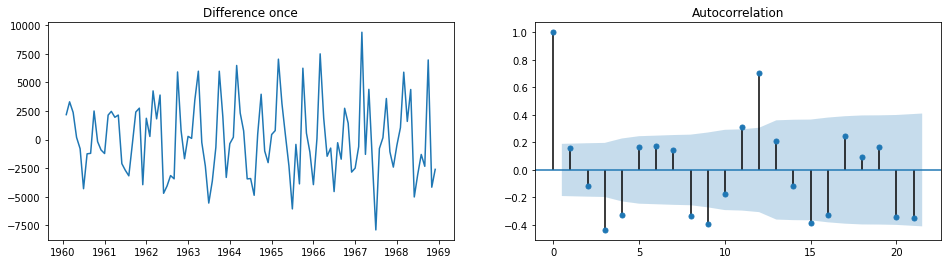

In [ ]:
diff = df1.Sales.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

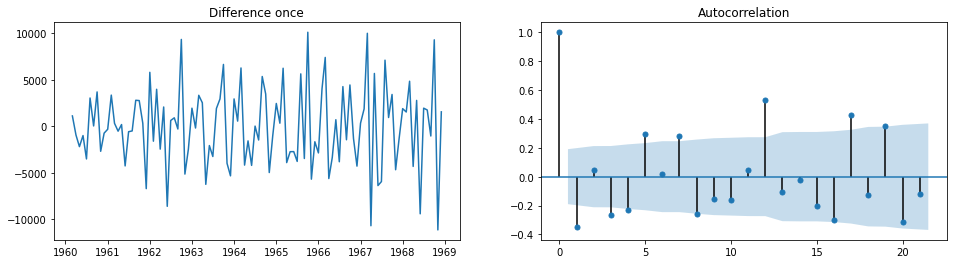

In [ ]:
diff = df1.Sales.diff().diff().dropna()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_acf(diff, ax=ax2);

In [ ]:
#!pip install pmdarima

In [ ]:
from pmdarima.arima.utils import ndiffs
ndiffs(df1.Sales, test="adf")

0

p is the order of the auto regressive term

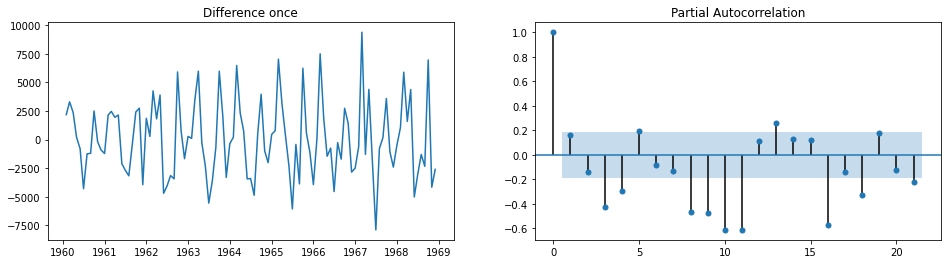

In [ ]:
from statsmodels.graphics.tsaplots import plot_pacf
diff = df1.Sales.diff().dropna()
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(16,4))
ax1.plot(diff)
ax1.set_title("Difference once")
plot_pacf(diff, ax=ax2);

In [ ]:
# arima
#from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
# Train model
arima_model = ARIMA(df1['Sales'], order=(5,1,0))
arima_result = arima_model.fit()
print(arima_result.summary())

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/base/tsa_model.py:527: ValueWarning:

No frequency information was provided, so inferred frequency MS will be used.



                             ARIMA Model Results                              
Dep. Variable:                D.Sales   No. Observations:                  107
Model:                 ARIMA(5, 1, 0)   Log Likelihood                -999.662
Method:                       css-mle   S.D. of innovations           2746.033
Date:                Thu, 03 Jun 2021   AIC                           2013.324
Time:                        09:59:19   BIC                           2032.033
Sample:                    02-01-1960   HQIC                          2020.908
                         - 12-01-1968                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            49.3780    191.306      0.258      0.796    -325.575     424.331
ar.L1.D.Sales     0.0558      0.095      0.586      0.558      -0.131       0.242
ar.L2.D.Sales     0.0026      0.093     

(array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        ...,
        [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.00073338, 0.        , 0.        , ..., 0.        , 0.        ,
         0.        ],
        [0.        , 0.00073338, 0.        , ..., 0.        , 0.        ,
         0.        ]]),
 array([-5508.50832219, -4144.95906766, -2781.40981313, -1417.86055861,
          -54.31130408,  1309.23795045,  2672.78720497,  4036.3364595 ,
         5399.88571403,  6763.43496856,  8126.98422308]),
 <a list of 107 Lists of Patches objects>)

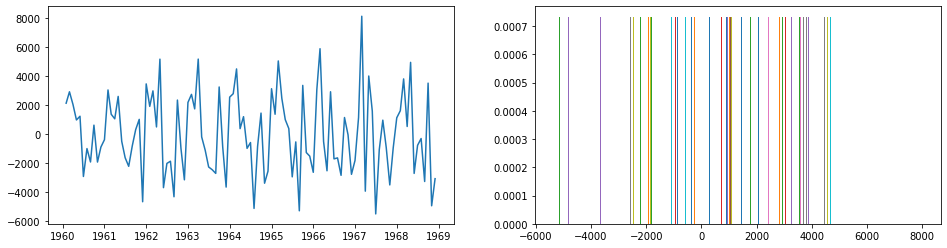

In [ ]:
residuals = pd.DataFrame(arima_result.resid)
fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,4))
ax1.plot(residuals)
ax2.hist(residuals, density=True)

1968-01-01    12086.533979
1968-02-01    12641.281138
1968-03-01    16334.386782
1968-04-01    21202.826904
1968-05-01    21153.075633
1968-06-01    23798.967294
1968-07-01    18800.922031
1968-08-01    17029.379079
1968-09-01    17657.405744
1968-10-01    17828.757305
1968-11-01    22127.063793
1968-12-01    17654.538444
Freq: MS, Name: ARIMA Predictions, dtype: float64


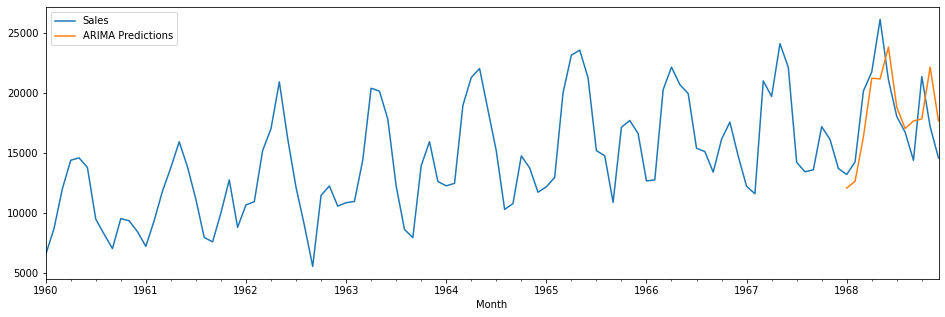

In [ ]:
#Prediction
arima_pred = arima_result.predict(start = len(df1)-12, end = len(df1)-1, typ="levels").rename("ARIMA Predictions")
print(arima_pred)

df1['Sales'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

In [ ]:
from sklearn.metrics import mean_squared_error
from statsmodels.tools.eval_measures import rmse
#Model Evaluation
arima_rmse_error = rmse(df1['Sales'][-12:], arima_pred)
arima_mse_error = arima_rmse_error**2
mean_value = df1['Sales'][-12:].mean()

print(f'MSE Error: {arima_mse_error}\nRMSE Error: {arima_rmse_error}\nMean: {mean_value}')

MSE Error: 9010718.235051472
RMSE Error: 3001.785840970583
Mean: 18228.166666666668


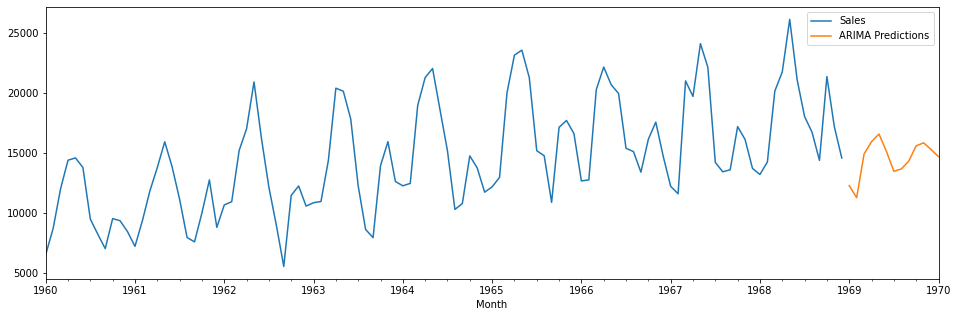

In [ ]:
#Prediction
arima_pred = arima_result.predict(start = len(df1), end = len(df1)+12, typ="levels").rename("ARIMA Predictions")
arima_pred

df1['Sales'].plot(figsize = (16,5), legend=True)
arima_pred.plot(legend = True);

### ***Prophet***









In [ ]:
# prepare expected column names
print(df.shape)
df2 = df.copy()
df2.columns = ['ds', 'y']

# define the model
model = Prophet()

# fit model
model.fit(df2)



(108, 2)


INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


### **In sample forecast**

          ds          yhat    yhat_lower    yhat_upper
0 1968-01-01  14334.737769  12751.886086  15916.615526
1 1968-02-01  14905.955964  13304.067585  16495.320827
2 1968-03-01  20842.150502  19208.905751  22436.089281
3 1968-04-01  22870.095215  21294.557777  24469.742265
4 1968-05-01  24176.211162  22576.088195  25746.952132


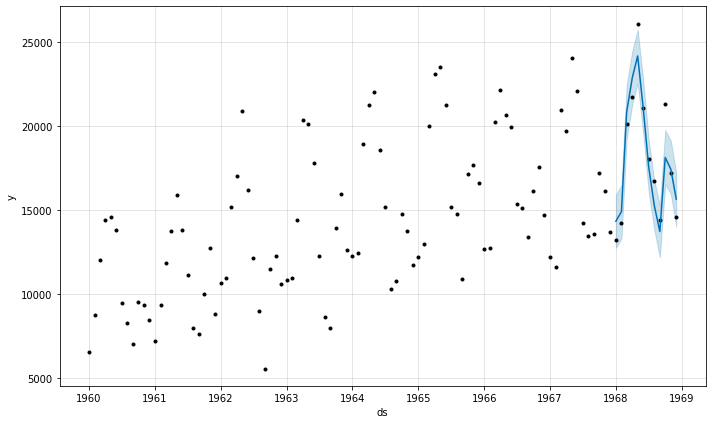

In [ ]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1968-%02d' % i
	future.append([date])
 
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()



In [ ]:
prophet_rmse_error = rmse(df2['y'][-12:], forecast['yhat'])
prophet_mse_error = prophet_rmse_error**2
mean_value = df2['y'][-13:-1].mean()

print(f'MSE Error: {prophet_mse_error}\nRMSE Error: {prophet_rmse_error}\nMean: {mean_value}')

MSE Error: 1783395.1844450273
RMSE Error: 1335.4381994106006
Mean: 18156.166666666668


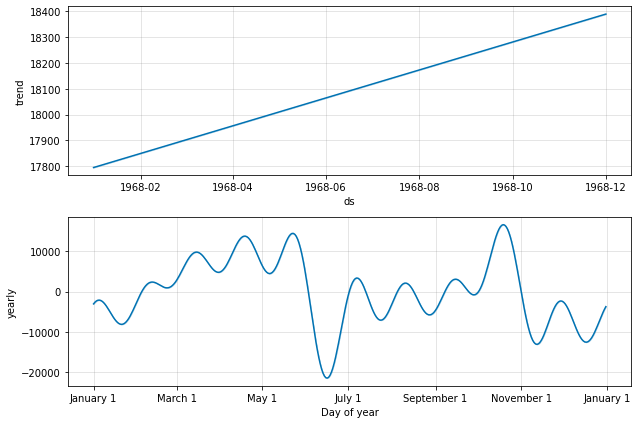

In [ ]:
fig1 = model.plot_components(forecast)

### **Out of sample forecast**

          ds          yhat    yhat_lower    yhat_upper
0 1969-01-01  15375.960093  13785.673118  16927.978261
1 1969-02-01  16142.271673  14652.504774  17646.925231
2 1969-03-01  21351.832640  19865.325497  22861.334639
3 1969-04-01  23477.889811  21857.004064  25019.539321
4 1969-05-01  24988.440907  23367.685454  26510.293049


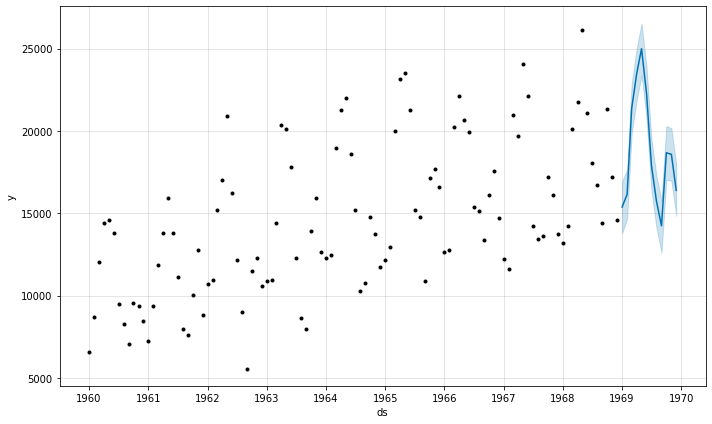

In [ ]:
# define the period for which we want a prediction
future = list()
for i in range(1, 13):
	date = '1969-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

<br/><br/><br/><br/><br/><br/><br/><br/><br/><br/><br/>












### **Exercise: Stock prediction**

In [ ]:
!pip install pandas_datareader

In [ ]:
import pandas_datareader as web
import datetime
start = datetime.datetime(2020, 1, 1)
end = datetime.datetime(2020, 6, 30)
df3 = web.DataReader("AAV.BK", 'yahoo', start, end)
df3.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-01-02,2.30,2.24,2.24,2.26,12692900,2.26
2020-01-03,2.28,2.18,2.26,2.24,8694000,2.24
2020-01-06,2.10,2.00,2.04,2.04,29648800,2.04
2020-01-07,2.10,2.02,2.06,2.08,12430700,2.08
2020-01-08,2.02,1.98,2.02,2.00,25940500,2.00


adj close คือราคาที่หักทุกอย่างแล้วทั้งปันผล แตกพาร์ ฯลฯ
ซึ่งเราจะใช้เป็นราคาดัชนีที่อ้างอิงผลการลงทุนได้.  เช่นบอกว่าซื้อ gl ปีนี้ ราคาสิบตัง
อีกปี ขายที่ ยี่สิบตัง.  แบบนี้แล้วมาบอกว่ากำไร 100%  ไม่สามารถเทียบได้นะครับ เพราะเราไม่ทราบว่า
ในระหว่างทาง มีระดมทุน pp แตกพาร์ ปันผลอะไรให้สับสนเล่นไปเท่าไหร่ https://pantip.com/topic/36202663

In [ ]:
df3.index=pd.to_datetime(df3.index)
df3.dropna(inplace=True)
print(df3)

            High   Low  Open  Close     Volume  Adj Close
Date                                                     
2020-01-02  2.30  2.24  2.24   2.26   12692900       2.26
2020-01-03  2.28  2.18  2.26   2.24    8694000       2.24
2020-01-06  2.10  2.00  2.04   2.04   29648800       2.04
2020-01-07  2.10  2.02  2.06   2.08   12430700       2.08
2020-01-08  2.02  1.98  2.02   2.00   25940500       2.00
...          ...   ...   ...    ...        ...        ...
2020-06-25  1.98  1.89  1.96   1.94  117467500       1.94
2020-06-26  1.96  1.83  1.96   1.85   96862900       1.85
2020-06-29  1.84  1.80  1.82   1.83   47816500       1.83
2020-06-30  2.04  1.89  1.90   1.99  188938100       1.99
2020-07-01  2.10  2.00  2.04   2.08  120978800       2.08

[124 rows x 6 columns]


In [ ]:
df3.drop(['High', 'Low', 'Open', 'Close', 'Volume'], axis = 1, inplace=True)
print(df3)

            Adj Close
Date                 
2020-01-02       2.26
2020-01-03       2.24
2020-01-06       2.04
2020-01-07       2.08
2020-01-08       2.00
...               ...
2020-06-25       1.94
2020-06-26       1.85
2020-06-29       1.83
2020-06-30       1.99
2020-07-01       2.08

[124 rows x 1 columns]


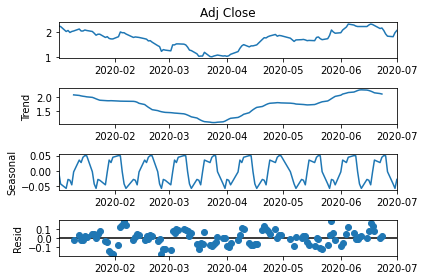

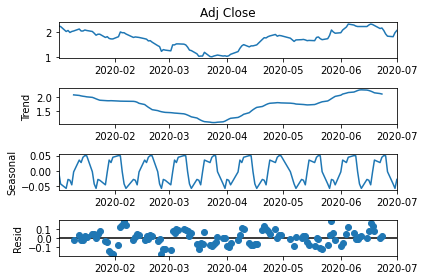

In [ ]:
result = seasonal_decompose(df3['Adj Close'],  model='additive', freq=12)
result.plot()

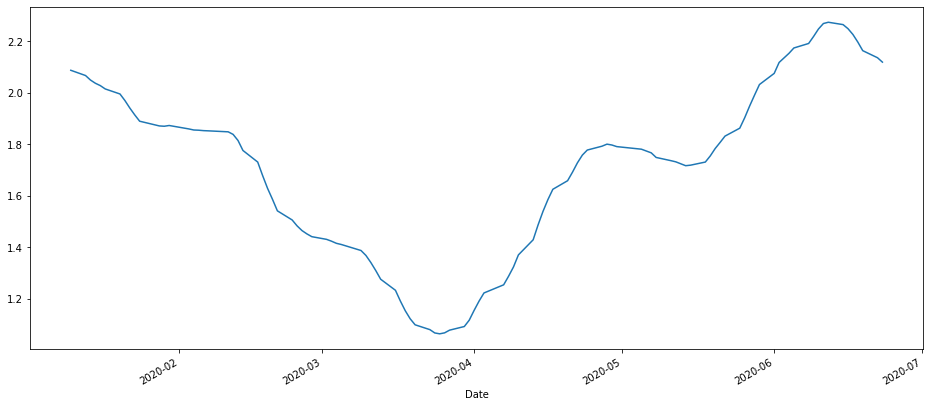

In [ ]:
plt.figure(figsize = (16,7))
result.trend.plot();

In [ ]:
df4 = df3.reset_index()
print(df4)

df4.columns = ['ds', 'y']

# define the model
model = Prophet()

# fit model
model.fit(df4)



INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


          Date  Adj Close
0   2020-01-02       2.26
1   2020-01-03       2.24
2   2020-01-06       2.04
3   2020-01-07       2.08
4   2020-01-08       2.00
..         ...        ...
119 2020-06-25       1.94
120 2020-06-26       1.85
121 2020-06-29       1.83
122 2020-06-30       1.99
123 2020-07-01       2.08

[124 rows x 2 columns]


            ds
94  2020-05-20
95  2020-05-21
96  2020-05-22
97  2020-05-25
98  2020-05-26
99  2020-05-27
100 2020-05-28
101 2020-05-29
102 2020-06-01
103 2020-06-02
104 2020-06-04
105 2020-06-05
106 2020-06-08
107 2020-06-09
108 2020-06-10
109 2020-06-11
110 2020-06-12
111 2020-06-15
112 2020-06-16
113 2020-06-17
114 2020-06-18
115 2020-06-19
116 2020-06-22
117 2020-06-23
118 2020-06-24
119 2020-06-25
120 2020-06-26
121 2020-06-29
122 2020-06-30
          ds      yhat  yhat_lower  yhat_upper
0 2020-05-20  1.833871    1.618783    2.043742
1 2020-05-21  1.860530    1.649093    2.056985
2 2020-05-22  1.866786    1.634241    2.067716
3 2020-05-25  1.869558    1.650849    2.089741
4 2020-05-26  1.914577    1.693224    2.130632


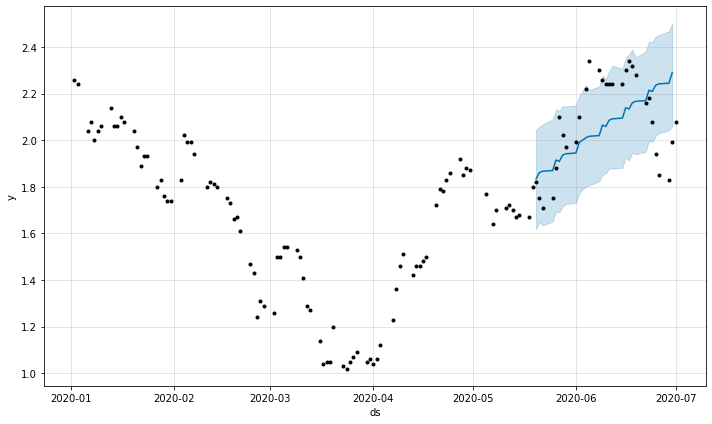

In [ ]:
# define the period for which we want a prediction
future = list()
future = pd.DataFrame(df4["ds"][-30:-1])
print(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

          ds      yhat  yhat_lower  yhat_upper
0 2020-07-01  2.283638    2.076893    2.484162
1 2020-07-02  2.310296    2.097529    2.511657
2 2020-07-03  2.316553    2.110509    2.542131
3 2020-07-04  2.364114    2.158488    2.569738
4 2020-07-05  2.374823    2.167335    2.588637


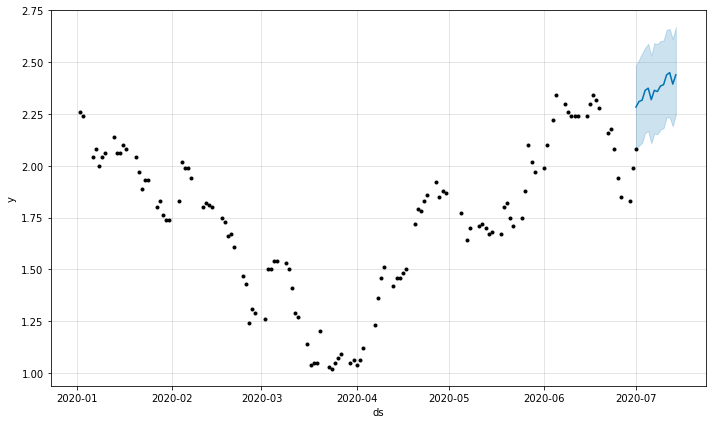

In [ ]:
# define the period for which we want a prediction
future = list()
for i in range(1, 15):
	date = '2020-07-%02d' % i
	future.append([date])
future = pd.DataFrame(future)
future.columns = ['ds']
future['ds']= pd.to_datetime(future['ds'])
# use the model to make a forecast
forecast = model.predict(future)
# summarize the forecast
print(forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].head())
# plot forecast
model.plot(forecast)
plt.show()

In [ ]:
start = datetime.datetime(2020, 7, 1)
end = datetime.datetime(2020, 7, 15)
df5 = web.DataReader("AAV.BK", 'yahoo', start, end)
df5.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2020-07-01,2.10,2.00,2.04,2.08,120978800,2.08
2020-07-02,2.08,2.02,2.04,2.04,51830700,2.04
2020-07-03,2.08,2.02,2.06,2.04,43925500,2.04
2020-07-07,2.16,2.08,2.12,2.10,75839700,2.10
2020-07-08,2.12,2.02,2.10,2.02,48341400,2.02
